In [2]:
# Want to touch on 

# The Kolmogorov-Smirnov Test
# ANOVA
# Cohen's d
# One sample T
# Two sample T

In [265]:

# 1.1 SALES - Do discounts have a statistically significant effect on the number of products customers order?
# 1.2 SALES - What level(s) of discounts are most effective in increasing quantity?
# 2.  EMPLOYEES - Are there any significant differences in the dollar amount of sales amongst employees?
# 3.  CUSTOMERS - Are any regions in Europe underperforming in customer sales?
# 4.  
# 5.  PRODUCTS - Are there any product categories that go on backorder more than average?




In [480]:
def visualization(control, experimental):
    plt.figure(figsize=(10,6))
    sns.distplot(experimental, bins=50,  label='Experimental')
    sns.distplot(control, bins=50,  label='Control')

    plt.axvline(x=control.mean(), color='k', linestyle='--')
    plt.axvline(x=experimental.mean(), color='k', linestyle='--')

    plt.title('Control and Experimental Sampling Distributions', fontsize=14)
    plt.xlabel('Distributions')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

![alt text](Northwind_ERD.png "Title")

In [5]:
# SQL 
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy.orm import Session, sessionmaker

# Analytical Tools
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import numpy as np # analysis
from scipy import stats # significance levels, normality
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols
import math

import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings

## Question 1.1: 

Do discounts have a statistically significant effect on the number of products customers order?

## Hypothesis 1.1:

#### Null:

Discounts do not have a significant effect on the number of products customers order.

#### Alternative:

Discounts do have a statistically significant effect on the number of products customers order. 

## Data 1.1:

Collecting data using SQL to create a control group of sales that do not contain a discount and a experimental group that does apply a discount. 

In [6]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()

con = engine.connect()
inspector = inspect(engine)
print(inspector.get_table_names())

2019-05-30 17:57:58,281 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-30 17:57:58,282 INFO sqlalchemy.engine.base.Engine ()
2019-05-30 17:57:58,284 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-30 17:57:58,288 INFO sqlalchemy.engine.base.Engine ()
2019-05-30 17:57:58,292 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-30 17:57:58,293 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [7]:
# Function to clean up the table names

def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    
    print("Table Name: {}".format(col_name))
    print("")
    
    for column in cols_list:
        print("Name: {} \t Type: {}".format(column['name'], column['type']))

get_columns_info('OrderDetail')

2019-05-30 17:57:59,281 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("OrderDetail")
2019-05-30 17:57:59,282 INFO sqlalchemy.engine.base.Engine ()
Table Name: OrderDetail

Name: Id 	 Type: VARCHAR(8000)
Name: OrderId 	 Type: INTEGER
Name: ProductId 	 Type: INTEGER
Name: UnitPrice 	 Type: DECIMAL
Name: Quantity 	 Type: INTEGER
Name: Discount 	 Type: FLOAT


In [8]:
# Pulling data with SQL and converting to pandas dataframe

rs = con.execute("SELECT * from OrderDetail")
columns = ['Id', 'OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'Discount']
df = pd.DataFrame(rs.fetchall(), columns = columns)
df.head()

2019-05-30 17:58:00,238 INFO sqlalchemy.engine.base.Engine SELECT * from OrderDetail
2019-05-30 17:58:00,240 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [9]:
control = df[df['Discount']==0]['Quantity']
experimental = df[df['Discount']!=0]['Quantity']

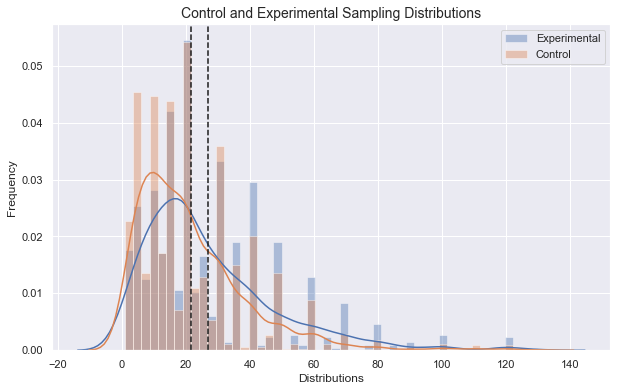

In [65]:
visualization(control, experimental)

## Experiment 1.1: 

Using a one sample t-test and comparing that to a t-critical value to determine whether or not the quantity of sales with a discount is significantly higher (alternative) than sales without a discount (null).

In [56]:
def one_sample_ttest(sample, mu, alpha):

    # Population mean 
    mu = np.mean(control)
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= np.mean(experimental)

    # Sample Stadrad Deviation (sigma) using Numpy
    sigma = np.std(experimental)
    
    # Degrees of freedom
    freedom = len(experimental) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=freedom)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= experimental, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print('T-value =', round(results[0], 2))
        print('Critical t-value =', np.round(t_crit, 3)) 
        print('P-value =', np.round((results[1]), 10))
        print ('Null hypothesis rejected.')
    else:
        print('T-value =', round(results[0], 2))
        print('Critical t-value =', np.round(t_crit, 3)) 
        print('P-value =', np.round((results[1]), 10))
        print ('Null hypothesis is accepted.')
        

In [63]:
one_sample_ttest(experimental, mu, 0.05)

T-value = 7.52
Critical t-value = 1.647
P-value = 0.0
Null hypothesis rejected.


## Analyze Results and Draw Conclusion 1.1:

Our T-value is greater than our Critical T-value and therefore our test rejects the null hypothesis. We can see that there is statistical significance showing sales with discounts show higher sales quantities.


# -----------------------------------------------------------------------------------------

## Question 1.2: 

What level(s) of discounts are most effective in increasing quantity?

## Hypothesis 1.2:

#### Null:

The level of discount does not have an effect on the quantity of items in the order.

#### Alternative:

The level of discount does have an effect on the quantity of the items in the order. 

## Data 1.2:

Using the same data frame, we will look at the various levels of discount and how many items were sold.

In [17]:
# Find all discount levels
discounts = df['Discount'].unique()
discounts.sort()
print('Discount levels')
print(discounts)

# Group orders by discount amounts
# Each group is a DataFrame containing orders with certain discount level
groups = {}
for i in discounts:
    groups[i] = df[df['Discount']==i]

# Create new DataFrame with Discounts and Order quantities
discounts_df = pd.DataFrame(columns=['Discount %','Orders','Avg. Order Quantity'])
for i in groups.keys():
    discounts_df = discounts_df.append({'Discount %':i*100,'Orders':len(groups[i]),'Avg. Order Quantity':groups[i]['Quantity'].mean()}, ignore_index=True)

discounts_df

Discount levels
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.1  0.15 0.2  0.25]


,Discount %,Orders,Avg. Order Quantity
0,0.0,1317.0,21.715262
1,1.0,1.0,2.000000
2,2.0,2.0,2.000000
3,3.0,3.0,1.666667
4,4.0,1.0,1.000000
5,5.0,185.0,28.010811
6,6.0,1.0,2.000000
7,10.0,173.0,25.236994
8,15.0,157.0,28.382166
9,20.0,161.0,27.024845


In [18]:
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [19]:
discounts = df['Discount'].tolist()
quantities = df['Quantity'].tolist()
disc5 = []
disc10 = []
disc15 = []
disc20 = []
disc25 = []

for i in discounts:
    if i == 0.05:
        disc5.append(1)
    else:
        disc5.append(0)

for i in discounts:
    if i == 0.10:
        disc10.append(1)
    else:
        disc10.append(0)
        
for i in discounts:
    if i == 0.15:
        disc15.append(1)
    else:
        disc15.append(0)
    
for i in discounts:
    if i == 0.20:
        disc20.append(1)
    else:
        disc20.append(0)

for i in discounts:
    if i == 0.25:
        disc25.append(1)
    else:
        disc25.append(0)

ANOVA_discounts = pd.DataFrame({'Quantity' : quantities,
                                'five' : disc5, 'ten' : disc10, 'fifteen' : disc15, 'twenty' : disc20, 'twentyfive' : disc25})

In [20]:
ANOVA_discounts.head()

,Quantity,five,ten,fifteen,twenty,twentyfive
0,12,0,0,0,0,0
1,10,0,0,0,0,0
2,5,0,0,0,0,0
3,9,0,0,0,0,0
4,40,0,0,0,0,0


## Experiment 1.2:

In [21]:
formula = 'Quantity ~ C(five) + C(ten) + C(fifteen) + C(twenty) + C(twentyfive)'
lm = ols(formula, ANOVA_discounts).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df          F    PR(>F)
C(five)          6682.701649     1.0  18.863661  0.000015
C(ten)           2030.000607     1.0   5.730204  0.016761
C(fifteen)       6466.666108     1.0  18.253844  0.000020
C(twenty)        4232.949011     1.0  11.948598  0.000558
C(twentyfive)    6092.974191     1.0  17.199002  0.000035
Residual       761311.705709  2149.0        NaN       NaN


In [22]:
# Values < .05 (or whatever we set  αα  to) indicate rejection of the null hypothesis
# 5, 15, 25, 20, 10

## Analyze Results and Draw Conclusion 1.2:

## Question 2:

Are there any significant differences in the dollar amount of sales amongst employees?

In [69]:
cur.execute("""SELECT OD.unitprice, OD.quantity, E.birthdate, E.Id FROM Employee as E
                        join [Order] as O 
                        on E.Id = O.EmployeeId
                        join [OrderDetail] as OD
                        on OD.OrderId = O.Id;
                        """)

dfq2 = pd.DataFrame(cur.fetchall())
dfq2.columns = [i[0] for i in cur.description]
dfq2['Total_Sale'] = dfq2['UnitPrice'] * dfq2['Quantity']
dfq2.head()

,UnitPrice,Quantity,BirthDate,Id,Total_Sale
0,14.0,12,1987-03-04,5,168.0
1,9.8,10,1987-03-04,5,98.0
2,34.8,5,1987-03-04,5,174.0
3,18.6,9,1995-07-02,6,167.4
4,42.4,40,1995-07-02,6,1696.0


In [70]:
eavg = np.mean(dfq2['Total_Sale'])
eavg

628.5190672853829

In [355]:
e1 = np.mean(dfq2[dfq2['Id']==1]['Total_Sale'])
e2 = np.mean(dfq2[dfq2['Id']==2]['Total_Sale'])
e3 = np.mean(dfq2[dfq2['Id']==3]['Total_Sale'])
e4 = np.mean(dfq2[dfq2['Id']==4]['Total_Sale'])
e5 = np.mean(dfq2[dfq2['Id']==5]['Total_Sale'])
e6 = np.mean(dfq2[dfq2['Id']==6]['Total_Sale'])
e7 = np.mean(dfq2[dfq2['Id']==7]['Total_Sale'])
e8 = np.mean(dfq2[dfq2['Id']==8]['Total_Sale'])
e9 = np.mean(dfq2[dfq2['Id']==9]['Total_Sale'])

In [356]:
employee_avg_sales = {'e1':e1, 'e2':e2, 'e3':e3, 'e4':e4, 'e5':e5, 'e6':e6, 'e7':e7, 'e8':e8, 'e9':e9, 'eavg':eavg}
employee_avg_sales_df = pd.DataFrame(employee_avg_sales, index = [0])
employee_avg_sales_df_log = np.log(employee_avg_sales_df)
employee_avg_sales_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,eavg
0,585.923797,737.548797,663.711215,595.684405,645.878205,465.464881,802.818125,512.696269,775.364486,628.519067


TypeError: 'int' object is not iterable

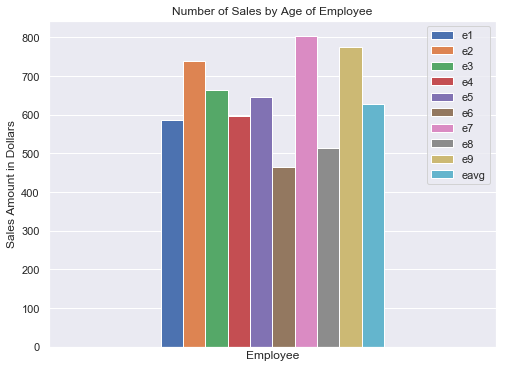

In [521]:
employee_avg_sales_df.plot(kind = 'bar', figsize = (8,6))
plt.title('Number of Sales by Age of Employee')
plt.xlabel('Employee')
plt.ylabel('Sales Amount in Dollars')
plt.xticks(np.arange(0), 10)
plt.show()

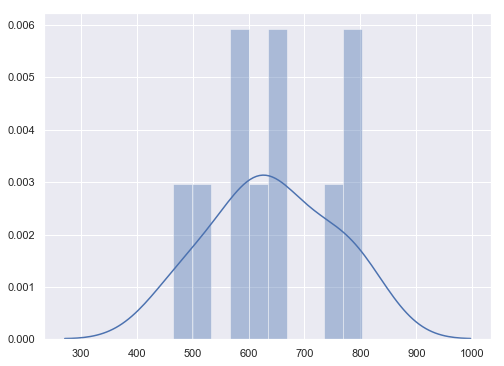

In [104]:
sns.distplot(employee_avg_sales_df, bins = 10)
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})

In [117]:
from scipy.stats import kruskal
stat, p = kruskal(e1, e2, e3, e4, e5, e6, e7, e8, e9)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=10.511, p=0.231
Same distributions (fail to reject H0)


## Question 3: 

Are any regions in Europe underperforming in customer sales?

In [130]:
conn = sqlite3.connect("Northwind_small.sqlite", detect_types=sqlite3.PARSE_COLNAMES)
cur = conn.cursor()

In [500]:
cur.execute("""SELECT * FROM [Order]
                        join Customer
                        on [Order].CustomerId = Customer.Id
                        join [OrderDetail]
                        on [OrderDetail].OrderId = [Order].Id""")

dfq3 = pd.DataFrame(cur.fetchall())
dfq3.columns = [i[0] for i in cur.description]
dfq3 = dfq3[['Id', 'City', 'Region', 'Country', 'OrderDate', 'UnitPrice', 'Quantity']]
dfq3['Total_Sale'] = dfq2['UnitPrice'] * dfq2['Quantity']
dfq3.head()

,Id,Id,Id,City,Region,Country,OrderDate,UnitPrice,Quantity,Total_Sale
0,10248,VINET,10248/11,Reims,Western Europe,France,2012-07-04,14.0,12,168.0
1,10248,VINET,10248/42,Reims,Western Europe,France,2012-07-04,9.8,10,98.0
2,10248,VINET,10248/72,Reims,Western Europe,France,2012-07-04,34.8,5,174.0
3,10249,TOMSP,10249/14,Münster,Western Europe,Germany,2012-07-05,18.6,9,167.4
4,10249,TOMSP,10249/51,Münster,Western Europe,Germany,2012-07-05,42.4,40,1696.0


In [503]:
W = dfq3[dfq3['Region']=='Western Europe']['Total_Sale']
E = dfq3[dfq3['Region']=='Eastern Europe']['Total_Sale']
S = dfq3[dfq3['Region']=='Southern Europe']['Total_Sale']
N = dfq3[dfq3['Region']=='Norhtern Europe']['Total_Sale']

In [504]:
stat, p = kruskal(N, W, E, S)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


## Question 4:

Do employees with more territories generate more sales?

In [318]:
cur.execute("""SELECT * FROM Employee AS e
               JOIN EmployeeTerritory AS et
               on e.Id = et.EmployeeId
               JOIN Territory AS t
               on et.TerritoryId = t.Id;""")

dfq4 = pd.DataFrame(cur.fetchall())
dfq4.columns = [i[0] for i in cur.description]
#dfq4 = dfq4[['Id', 'ProductName', 'UnitsInStock', 'UnitsOnOrder', 'CategoryName']]
dfq4.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,...,Photo,Notes,ReportsTo,PhotoPath,Id,EmployeeId,TerritoryId,Id,TerritoryDescription,RegionId
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,...,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,1/06897,1,06897,06897,Wilton,1
1,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,...,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp,1/19713,1,19713,19713,Neward,1
2,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,...,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2/01581,2,01581,01581,Westboro,1
3,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,...,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2/01730,2,01730,01730,Bedford,1
4,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,...,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp,2/01833,2,01833,01833,Georgetow,1


In [457]:
emp1_terr = dfq4[dfq4['EmployeeId']==1]['TerritoryId'].unique().shape[0]
emp2_terr = dfq4[dfq4['EmployeeId']==2]['TerritoryId'].unique().shape[0]
emp3_terr = dfq4[dfq4['EmployeeId']==3]['TerritoryId'].unique().shape[0]
emp4_terr = dfq4[dfq4['EmployeeId']==4]['TerritoryId'].unique().shape[0]
emp5_terr = dfq4[dfq4['EmployeeId']==5]['TerritoryId'].unique().shape[0]
emp6_terr = dfq4[dfq4['EmployeeId']==6]['TerritoryId'].unique().shape[0]
emp7_terr = dfq4[dfq4['EmployeeId']==7]['TerritoryId'].unique().shape[0]
emp8_terr = dfq4[dfq4['EmployeeId']==8]['TerritoryId'].unique().shape[0]
emp9_terr = dfq4[dfq4['EmployeeId']==9]['TerritoryId'].unique().shape[0]

In [436]:
# Num of Territories
# 2, 7, 4, 3, 7, 5, 10, 4, 7

# High territories > 6 (Employee Id's 2, 5, 7, 9)
# Low territories < 6 (Employee Id's 1, 3, 4, 6, 8)

In [ ]:
# avg. sales high terr vs. avg. sales low terr

In [466]:
df_high_terr1 = dfq2.loc[(dfq2['Id'] == 2)]
df_high_terr2 = dfq2.loc[(dfq2['Id'] == 5)]
df_high_terr3 = dfq2.loc[(dfq2['Id'] == 7)]
df_high_terr4 = dfq2.loc[(dfq2['Id'] == 9)]

In [468]:
df_high_terr = pd.concat([df_high_terr1, df_high_terr2, df_high_terr3, df_high_terr4])

In [471]:
df_low_terr1 = dfq2.loc[(dfq2['Id'] == 1)]
df_low_terr2 = dfq2.loc[(dfq2['Id'] == 3)]
df_low_terr3 = dfq2.loc[(dfq2['Id'] == 4)]
df_low_terr4 = dfq2.loc[(dfq2['Id'] == 6)]
df_low_terr5 = dfq2.loc[(dfq2['Id'] == 8)]

In [472]:
df_low_terr = pd.concat([df_low_terr1, df_low_terr2, df_low_terr3, df_low_terr4, df_low_terr5])

In [488]:
experimental = df_high_terr['Total_Sale']
control = df_low_terr['Total_Sale']

In [490]:
np.mean(experimental)

745.04992199688

In [491]:
np.mean(control)

579.1820277410839

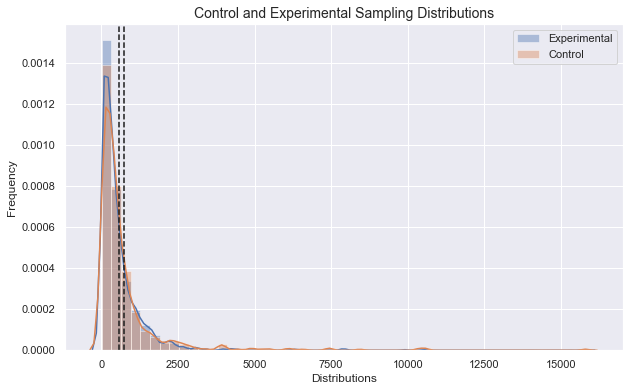

In [493]:
visualization(experimental, control)


In [498]:
st, p = stats.ttest_ind(control, experimental)
print('Statistics = %.3f, p = %.3f' % (st, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
print('---------------------------------------------')

Statistics = -3.404, p = 0.001
Different distributions (reject H0)
---------------------------------------------


## Question 5: 

Are there any product categories that go on backorder more than average?

In [215]:
cur.execute("""SELECT * FROM Product
                        JOIN [OrderDetail]
                        on [OrderDetail].ProductId = Product.Id
                        JOIN Category
                        on Category.Id = Product.CategoryId;""")

dfq5 = pd.DataFrame(cur.fetchall())
dfq5.columns = [i[0] for i in cur.description]
dfq5 = dfq5[['Id', 'ProductName', 'UnitsInStock', 'UnitsOnOrder', 'CategoryName']]
dfq5.head()

,Id,Id,Id,ProductName,UnitsInStock,UnitsOnOrder,CategoryName
0,11,10248/11,4,Queso Cabrales,22,30,Dairy Products
1,42,10248/42,5,Singaporean Hokkien Fried Mee,26,0,Grains/Cereals
2,72,10248/72,4,Mozzarella di Giovanni,14,0,Dairy Products
3,14,10249/14,7,Tofu,35,0,Produce
4,51,10249/51,7,Manjimup Dried Apples,20,0,Produce


In [234]:
cur.execute("""SELECT * FROM Product
                        JOIN [OrderDetail]
                        on [OrderDetail].ProductId = Product.Id
                        JOIN Category
                        on Category.Id = Product.CategoryId
                        WHERE UnitsInStock < UnitsOnOrder;""")

backorder_dfq5 = pd.DataFrame(cur.fetchall())
backorder_dfq5.columns = [i[0] for i in cur.description]
backorder_dfq5 = backorder_dfq5[['Id', 'ProductName', 'UnitsInStock', 'UnitsOnOrder', 'CategoryName']]
backorder_dfq5['UnitsonBackorder'] = backorder_dfq5['UnitsOnOrder'] - backorder_dfq5['UnitsInStock']
backorder_dfq5.head()

,Id,Id,Id,ProductName,UnitsInStock,UnitsOnOrder,CategoryName,UnitsonBackorder
0,11,10248/11,4,Queso Cabrales,22,30,Dairy Products,8
1,31,10253/31,4,Gorgonzola Telino,0,70,Dairy Products,70
2,49,10253/49,3,Maxilaku,10,60,Confections,50
3,74,10254/74,7,Longlife Tofu,4,20,Produce,16
4,2,10255/2,1,Chang,17,40,Beverages,23


In [222]:
dfq5['CategoryName'].unique()

array(['Dairy Products', 'Grains/Cereals', 'Produce', 'Seafood',
       'Condiments', 'Confections', 'Beverages', 'Meat/Poultry'],
      dtype=object)

In [ ]:
#x = category name(backorder and nonbackorder)
#y = value counts

In [259]:
control = backorder_dfq5['UnitsonBackorder']

In [261]:
dairy = backorder_dfq5[backorder_dfq5['CategoryName']=='Dairy Products']['UnitsonBackorder']
grains = backorder_dfq5[backorder_dfq5['CategoryName']=='Grains/Cereals']['UnitsonBackorder']
produce = backorder_dfq5[backorder_dfq5['CategoryName']=='Produce']['UnitsonBackorder']
seafood = backorder_dfq5[backorder_dfq5['CategoryName']=='Seafood']['UnitsonBackorder']
condiments = backorder_dfq5[backorder_dfq5['CategoryName']=='Condiments']['UnitsonBackorder']
confections = backorder_dfq5[backorder_dfq5['CategoryName']=='Confections']['UnitsonBackorder']
beverages = backorder_dfq5[backorder_dfq5['CategoryName']=='Beverages']['UnitsonBackorder']

In [418]:
product_list = {'dairy':dairy, 'grains':grains, 'produce':produce, 'seafood':seafood, 'condiments':condiments, 'confections':confections, 'beverages':beverages}


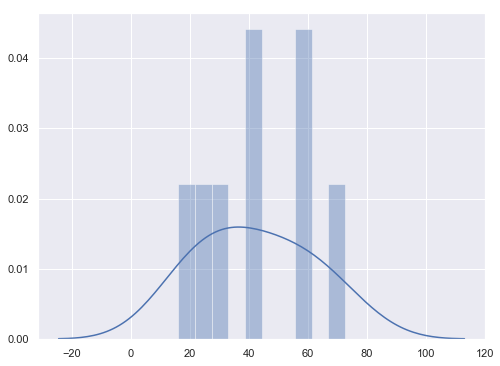

In [248]:
sns.distplot(dfq5_test, bins = 10)
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,6)})

In [422]:
for key, value in product_list.items():
    stat, p = kruskal(control, value)
    print(key)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
    print('---------------------------------------------')

dairy
Statistics=3.340, p=0.068
Same distributions (fail to reject H0)
---------------------------------------------
grains
Statistics=18.281, p=0.000
Different distributions (reject H0)
---------------------------------------------
produce
Statistics=10.451, p=0.001
Different distributions (reject H0)
---------------------------------------------
seafood
Statistics=11.957, p=0.001
Different distributions (reject H0)
---------------------------------------------
condiments
Statistics=20.188, p=0.000
Different distributions (reject H0)
---------------------------------------------
confections
Statistics=14.513, p=0.000
Different distributions (reject H0)
---------------------------------------------
beverages
Statistics=14.804, p=0.000
Different distributions (reject H0)
---------------------------------------------
